<a href="https://colab.research.google.com/github/Creatrohit9/tele_churn-ANALYSIS/blob/main/rohit_bhadauriya_EDA_2Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [5]:
!pip install klib

In [39]:

import klib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
file_path='/content/drive/MyDrive/Copy of Telecom Churn.csv'
tele_df=pd.read_csv(file_path)

TypeError: ignored

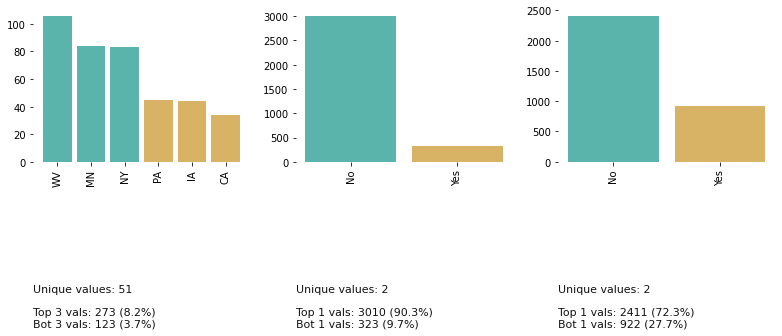

In [41]:
klib.cat_plot(tele_df)
klib.corr_plot(tele_df)
klib.corr_mat(tele_df)
klib.dist_plot(tele_df)
klib.missingval_plot(tele_df)


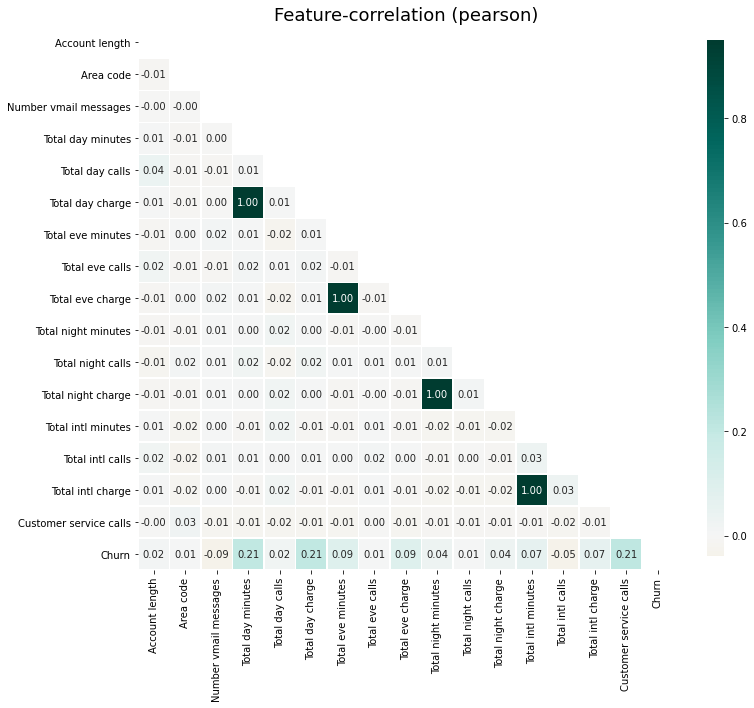

In [42]:
klib.corr_plot(tele_df)


In [43]:

klib.missingval_plot(tele_df)

No missing values found in the dataset.


In [9]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
tele_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [12]:
tele_df.shape

(3333, 20)

In [13]:
tele_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [14]:

print("Columns and data types")
pd.DataFrame(tele_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [15]:
# Checking Duplicate Values
len(tele_df[tele_df.duplicated()])

0

In [16]:
tele_df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [17]:
tele_df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [18]:

tele_df['State'].nunique()

51

In [19]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

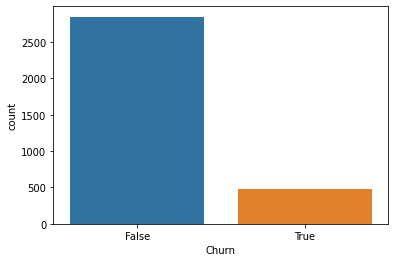

In [20]:
sns.countplot(x=tele_df.Churn)

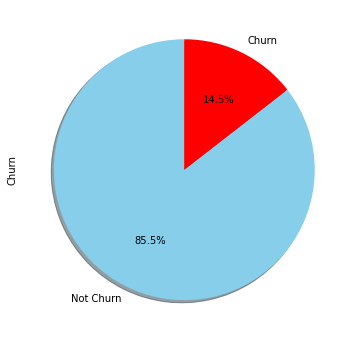

In [21]:
tele_df['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [22]:
tele_df['State'].nunique()

51

In [23]:
tele_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

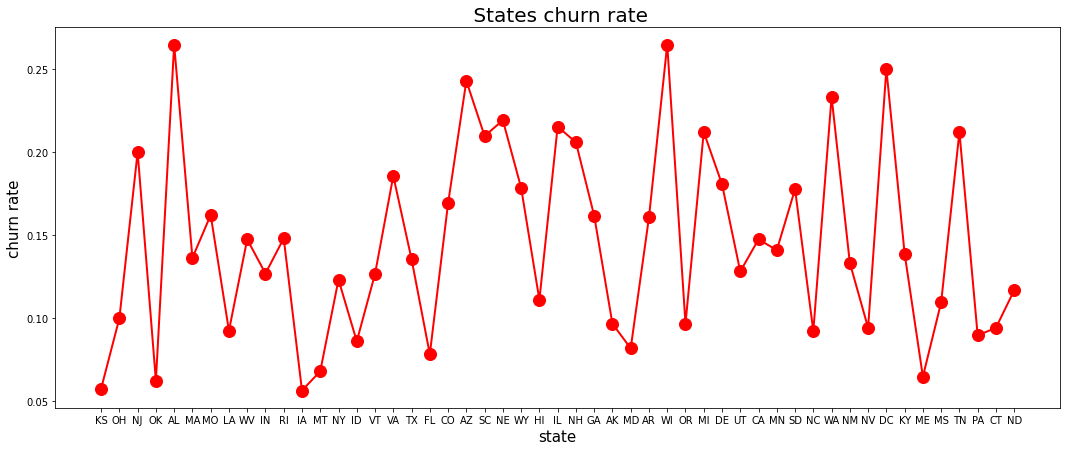

In [24]:
s1=tele_df['State'].unique()
s2=tele_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

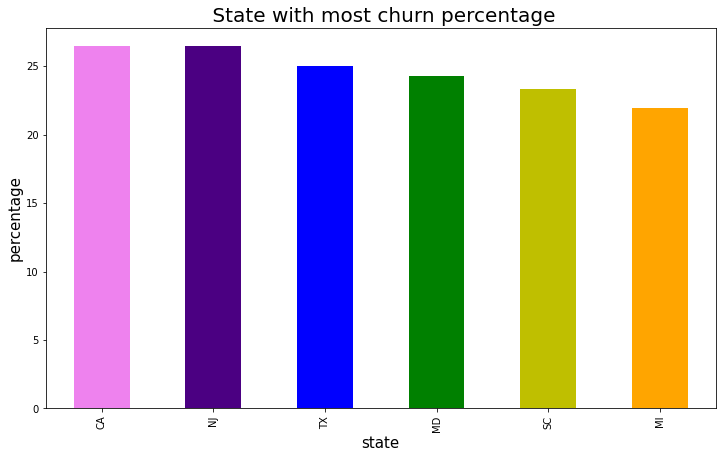

In [25]:
# plot gives lots for the churn observation
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 7)

color = plt.cm.copper(np.linspace(0, 0.5, 20))
((tele_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

<BarContainer object of 51 artists>

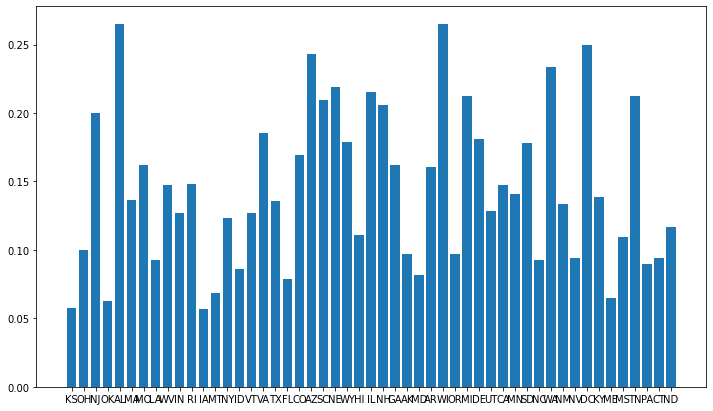

In [26]:
state_churn=tele_df.groupby(['State'])['Churn'].mean()
plt.rcParams['figure.figsize'] = (12, 7)
plt.bar(tele_df['State'].unique(),state_churn)

In [27]:
print(print(tele_df.groupby('Account length')['Churn'].mean().sort_values(ascending=True)))

Account length
243    0.0
194    0.0
192    0.0
30     0.0
31     0.0
      ... 
224    0.5
225    0.5
208    1.0
2      1.0
188    1.0
Name: Churn, Length: 212, dtype: float64
None


In [28]:
tele_df['Account length'].max()

243

In [29]:

tele_df[tele_df['Account length']<=9].loc[:,['Churn']].value_counts()

Churn
False    22
True      2
dtype: int64

In [30]:

tele_df[tele_df['Account length']<=9].shape

(24, 20)

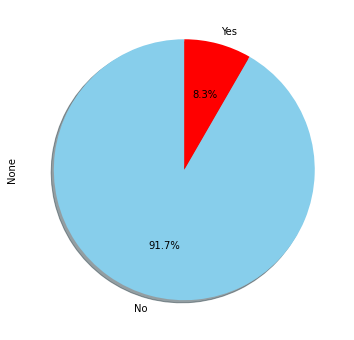

In [31]:
tele_df[tele_df['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [32]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].loc[:,['Churn']].value_counts()

Churn
False    1378
True      225
dtype: int64

In [33]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].shape

(1603, 20)

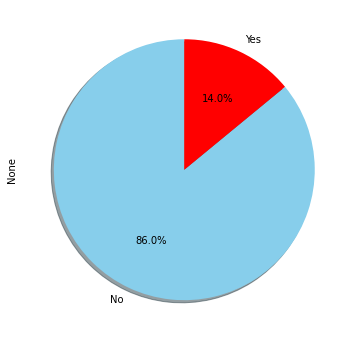

In [34]:
tele_df[(tele_df['Account length']<=99) & (tele_df['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


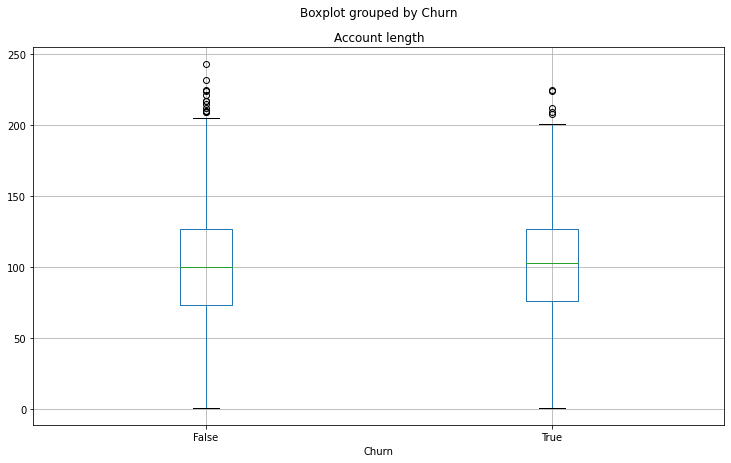

In [35]:
# Box Plot for Account Length attribute 
tele_df.boxplot(column='Account length',by='Churn')

In [36]:
print(tele_df['Area code'].value_counts())
print(" ")
print(tele_df.groupby(['Area code'])['Churn'].value_counts())
print(" ")
print(print(tele_df.groupby('Area code')['Churn'].mean()))

415    1655
510     840
408     838
Name: Area code, dtype: int64
 
Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64
 
Area code
408    0.145585
415    0.142598
510    0.148810
Name: Churn, dtype: float64
None


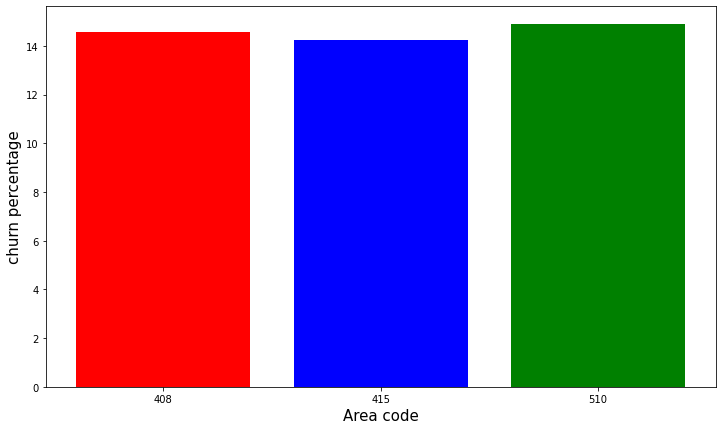

In [37]:
a1= list(['408','415' , '510'])
b1= tele_df.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['r','b','g'])

plt.rcParams['figure.figsize'] = (8, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()